## Step 1: Setup and Data Preprocessing

- Start by importing the necessary libraries and load the spam.csv dataset.

- Preprocess the data by encoding categorical variables, defining features and target, and splitting the data into training and testing sets. Finally, apply PCA to reduce dimensionality.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset
spam = pd.read_csv("data/spam.csv")

# Encode categorical variables
categorical_columns = spam.select_dtypes(include = ['object', 'category']).columns.tolist()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    spam[col] = label_encoders[col].fit_transform(spam[col])

# Define features and target
X = spam.drop('yesno', axis = 1)
y = spam['yesno']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 2: Model Training and Decision Boundary Visualization

- Train a Decision Tree classifier on the PCA-transformed training data.

- Implement and use the `decisionplot` function (from the lecture) to visualize the decision boundary of your trained model.

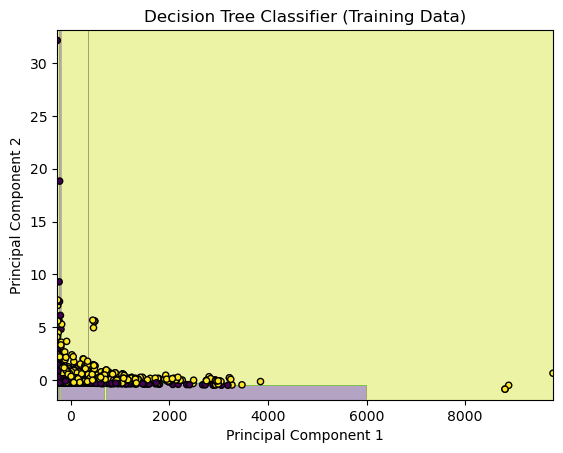

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

import numpy as np
import matplotlib.pyplot as plt

def decisionplot(X, y, classifier, title):
    """
    Visualize the decision boundary of a classifier.

    Parameters:
    - X: Input features
    - y: Target labels
    - classifier: Trained classifier
    - title: Title for the plot
    """
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Visualize decision boundary
decisionplot(X_train_pca, y_train, dtree, title='Decision Tree Classifier (Training Data)')


## Step 3: Model Evaluation

- Evaluate your model using accuracy, precision, recall, F1 score, and AUC-ROC metrics.

## Assignment:
- Implement the missing parts of the code: the decisionplot function and AUC-ROC calculation.

- Discuss the results among your peers. Consider the following:

    - Which metric is most informative for this problem and why?

    - How does the decision boundary visualization help in understanding the model’s performance?

    - Reflect on the impact of PCA on model performance and decision boundary.

